<a href="https://colab.research.google.com/github/Imran1hp/Waste-Cassification/blob/main/Waste_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import os

In [3]:
import opendatasets as od

In [4]:
data_url ="https://www.kaggle.com/datasets/wasifmahmood01/custom-waste-classification-dataset"
od.download(data_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: imranlaskar123
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/wasifmahmood01/custom-waste-classification-dataset


100%|██████████| 5.39G/5.39G [02:12<00:00, 43.6MB/s]

In [17]:
os.listdir()


['.config', 'custom-waste-classification-dataset', 'sample_data']

In [18]:
from pathlib import Path
folder_name = 'wastes'
data_path = Path("custom-waste-classification-dataset/")
img_path = data_path/folder_name
img_path

PosixPath('custom-waste-classification-dataset/wastes')

In [32]:
def walk_through_data(dir_path):
  for dirpath ,dirnames ,filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath} ")

In [20]:
walk_through_data(img_path)

There are 2 directories and 0 images in custom-waste-classification-dataset/wastes 
There are 9 directories and 0 images in custom-waste-classification-dataset/wastes/train 
There are 0 directories and 420 images in custom-waste-classification-dataset/wastes/train/light bulbs 
There are 0 directories and 1231 images in custom-waste-classification-dataset/wastes/train/metal waste 
There are 0 directories and 1248 images in custom-waste-classification-dataset/wastes/train/E-waste 
There are 0 directories and 1370 images in custom-waste-classification-dataset/wastes/train/paper waste 
There are 0 directories and 1022 images in custom-waste-classification-dataset/wastes/train/glass waste 
There are 0 directories and 848 images in custom-waste-classification-dataset/wastes/train/battery waste 
There are 0 directories and 1315 images in custom-waste-classification-dataset/wastes/train/plastic waste 
There are 0 directories and 871 images in custom-waste-classification-dataset/wastes/train/au

In [21]:
train_dir = img_path/"train"
test_dir = img_path/"test"

In [10]:
train_dir , test_dir

(PosixPath('custom-waste-classification-dataset/wastes/train'),
 PosixPath('custom-waste-classification-dataset/wastes/test'))

In [22]:
img_path

PosixPath('custom-waste-classification-dataset/wastes')

##Opena random image using file path

Image path custom-waste-classification-dataset/wastes/test/automobile wastes/automobile waste  (162).jpg
Image Class: automobile wastes
Image Height: 408
Image width: 612


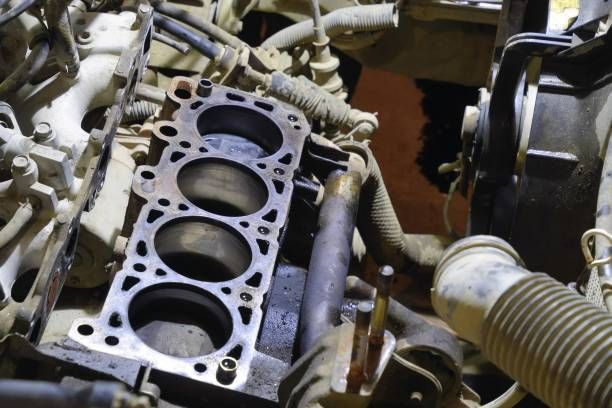

In [87]:
import random
from  PIL import Image
random.seed(42)
img_path_list = list(img_path.glob("*/*/*.jpg"))
rand_img_path = random.choice(img_path_list)
class_name = rand_img_path.parent.stem
img = Image.open(rand_img_path)
print(f"Image path {rand_img_path}")
print(f"Image Class: {class_name}")
print(f"Image Height: {img.height}")
print(f"Image width: {img.width}")
img

(np.float64(-0.5), np.float64(611.5), np.float64(407.5), np.float64(-0.5))

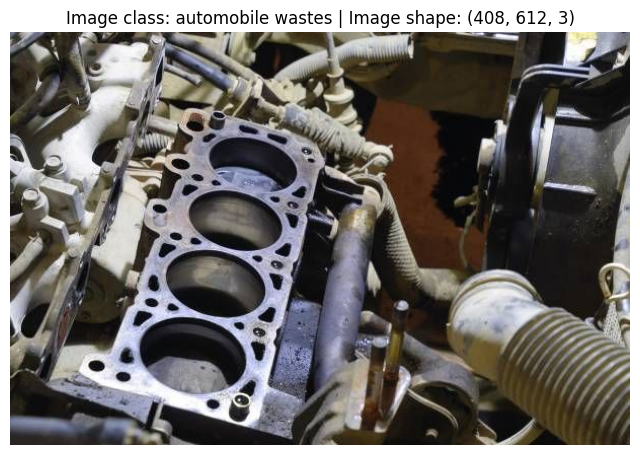

In [88]:
import matplotlib.pyplot as plt
import numpy as np


img_array = np.array(img)

plt.figure(figsize=(8,7))

plt.imshow(img_array)
plt.title(f"Image class: {class_name} | Image shape: {img_array.shape}")
plt.axis(False)


## Make the transform fucntion to tramsform the image

In [89]:
from torchvision import datasets , transforms

train_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip( p=0.5)

])
test_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])
train_transform , test_transform

(Compose(
     Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
     ToTensor()
     RandomHorizontalFlip(p=0.5)
 ),
 Compose(
     Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
     ToTensor()
 ))

In [90]:
trans_img = train_transform(img)
trans_img

tensor([[[0.4275, 0.5647, 0.6314,  ..., 0.5059, 0.5922, 0.3451],
         [0.4627, 0.5490, 0.6549,  ..., 0.3412, 0.4549, 0.3529],
         [0.3725, 0.4549, 0.6824,  ..., 0.5412, 0.3255, 0.4196],
         ...,
         [0.2745, 0.2314, 0.2196,  ..., 0.3647, 0.3451, 0.3176],
         [0.2118, 0.1961, 0.1961,  ..., 0.2078, 0.2000, 0.1882],
         [0.1882, 0.1843, 0.2039,  ..., 0.1647, 0.1647, 0.1647]],

        [[0.4392, 0.5725, 0.6549,  ..., 0.5059, 0.5882, 0.3490],
         [0.4667, 0.5608, 0.6784,  ..., 0.3451, 0.4667, 0.3529],
         [0.3647, 0.4588, 0.7020,  ..., 0.5490, 0.3373, 0.4235],
         ...,
         [0.2510, 0.2078, 0.1882,  ..., 0.3765, 0.3569, 0.3294],
         [0.1843, 0.1725, 0.1608,  ..., 0.2000, 0.1882, 0.1765],
         [0.1608, 0.1529, 0.1647,  ..., 0.1490, 0.1412, 0.1412]],

        [[0.4902, 0.6431, 0.7176,  ..., 0.5725, 0.5961, 0.3569],
         [0.4941, 0.6118, 0.7412,  ..., 0.3608, 0.4902, 0.3412],
         [0.3608, 0.4941, 0.7569,  ..., 0.5255, 0.3333, 0.

(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

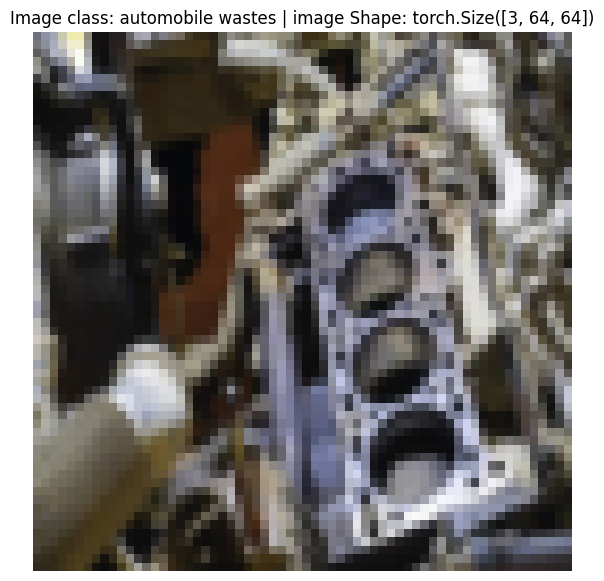

In [91]:

plt.figure(figsize=(10,7))
plt.imshow(trans_img.permute(1,2,0).numpy())
plt.title(f"Image class: {class_name} | image Shape: {trans_img.shape}")
plt.axis(False)

##Loading the image Data using ImageFolder Madule

In [92]:
train_dir , test_dir

(PosixPath('custom-waste-classification-dataset/wastes/train'),
 PosixPath('custom-waste-classification-dataset/wastes/test'))

In [93]:
from torchvision.datasets import ImageFolder
train_data = ImageFolder(root = train_dir , transform = train_transform ,target_transform = None)
test_data = ImageFolder(root = test_dir , transform = test_transform , target_transform = None)



In [94]:
train_data , test_data

(Dataset ImageFolder
     Number of datapoints: 9214
     Root location: custom-waste-classification-dataset/wastes/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
                RandomHorizontalFlip(p=0.5)
            ),
 Dataset ImageFolder
     Number of datapoints: 2308
     Root location: custom-waste-classification-dataset/wastes/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [95]:
class_names = train_data.classes
class_names

['E-waste',
 'automobile wastes',
 'battery waste',
 'glass waste',
 'light bulbs',
 'metal waste',
 'organic waste',
 'paper waste',
 'plastic waste']

In [96]:
class_name_idx = train_data.class_to_idx
class_name_idx

{'E-waste': 0,
 'automobile wastes': 1,
 'battery waste': 2,
 'glass waste': 3,
 'light bulbs': 4,
 'metal waste': 5,
 'organic waste': 6,
 'paper waste': 7,
 'plastic waste': 8}

In [97]:
len(train_data) ,len(test_data)

(9214, 2308)

(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

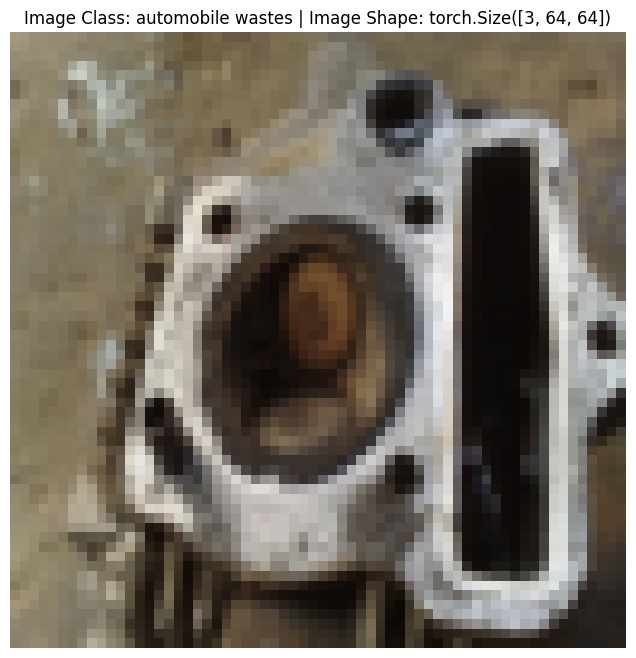

In [98]:
import random
rand_sample = random.choice(train_data)
load_img , load_class_name = rand_sample[0],rand_sample[1]
plt.figure(figsize=(10,8))
plt.imshow(load_img.permute(1,2,0).numpy())
plt.title(f"Image Class: {class_names[load_class_name]} | Image Shape: {load_img.shape}")
plt.axis(False)

## Load and Batch the data using DataLoader Madule

In [101]:
from torch.utils.data import DataLoader
import os
BATCH_SIZE =32
NUM_WORKERS = os.cpu_count()

train_dataloader = DataLoader(dataset = train_data , batch_size = BATCH_SIZE , shuffle = True , num_workers= NUM_WORKERS)
test_dataloader = DataLoader(dataset = test_data , batch_size = BATCH_SIZE , shuffle = True , num_workers = NUM_WORKERS)

train_dataloader , test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7e41bc89c0e0>,
 <torch.utils.data.dataloader.DataLoader at 0x7e41bc89c470>)

In [102]:
len(train_dataloader) ,len(test_dataloader)

(288, 73)

In [103]:
len(train_data)/32 , len(test_data)/32

(287.9375, 72.125)

In [104]:
train_feature_batch , train_label_batch = next(iter(train_dataloader))
train_feature_batch.shape , train_label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [105]:
train_feature_batch[31] , train_label_batch[31]

(tensor([[[0.6275, 0.6275, 0.6275,  ..., 0.6275, 0.6275, 0.6275],
          [0.6275, 0.6275, 0.6275,  ..., 0.6275, 0.6275, 0.6275],
          [0.6275, 0.6275, 0.6275,  ..., 0.6275, 0.6275, 0.6275],
          ...,
          [0.6275, 0.6275, 0.6275,  ..., 0.6235, 0.6235, 0.6235],
          [0.6275, 0.6275, 0.6275,  ..., 0.6275, 0.6275, 0.6275],
          [0.6275, 0.6275, 0.6275,  ..., 0.6275, 0.6275, 0.6275]],
 
         [[0.8863, 0.8863, 0.8863,  ..., 0.8863, 0.8863, 0.8863],
          [0.8863, 0.8863, 0.8863,  ..., 0.8863, 0.8863, 0.8863],
          [0.8863, 0.8863, 0.8863,  ..., 0.8863, 0.8863, 0.8863],
          ...,
          [0.8863, 0.8863, 0.8863,  ..., 0.8863, 0.8863, 0.8863],
          [0.8863, 0.8863, 0.8863,  ..., 0.8863, 0.8863, 0.8863],
          [0.8863, 0.8863, 0.8863,  ..., 0.8863, 0.8863, 0.8863]],
 
         [[0.9490, 0.9490, 0.9490,  ..., 0.9490, 0.9490, 0.9490],
          [0.9490, 0.9490, 0.9490,  ..., 0.9490, 0.9490, 0.9490],
          [0.9490, 0.9490, 0.9490,  ...,